In [ ]:
pip install camtrapml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# For running inference on the TF-Hub module.
import pandas as pd
import numpy as np

import tensorflow as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageOps

# For measuring the inference time.
import time
import os
# Print Tensorflow version
print(tf.__version__)

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

2.8.2
The following GPU devices are available: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
labels = pd.read_csv('/content/drive/MyDrive/ieee-final-round/train_labels.csv') # change this

In [ ]:
labels.drop('id' , axis = 1 , inplace = True)

In [ ]:
for index, row in labels.iterrows():
    max_value = row.argmax()
    labels.loc[index,'label'] = max_value

In [ ]:
labels[['label']] = labels[['label']].astype(np.uint8)

In [ ]:
labels_ = labels['label'].copy()

In [ ]:
classes = len(labels_.unique())
classes

8

In [ ]:
images_path = '/content/drive/MyDrive/ieee-final-round/train_features/train_features' # change this

In [ ]:
images_name = sorted(os.listdir(images_path)) # we need to sort so we got the images as in local and in the labels

In [ ]:
images_name[0:5] # workes fine

['ZJ000000.jpg',
 'ZJ000001.jpg',
 'ZJ000002.jpg',
 'ZJ000004.jpg',
 'ZJ000006.jpg']

In [ ]:
for i in images_name:
  if '(' in i:
    images_name.remove(i)
len(images_name)

12729

In [ ]:
from camtrapml.detection.models.megadetector import MegaDetectorV4_1
from camtrapml.detection.utils import render_detections
from camtrapml.image.utils import load_image, thumbnail
from camtrapml.detection.utils import extract_detections_from_image

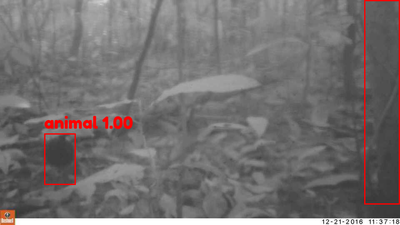

In [ ]:
with MegaDetectorV4_1() as detector:
   detections = detector.detect(os.path.join(images_path ,images_name[0] ))

thumbnail(
  render_detections(os.path.join(images_path ,images_name[0] ), detections, class_map=detector.class_map)
)

In [ ]:
folders = ['0','1','2','3','4','5','6','7']
train_clean_dir = '/content/drive/MyDrive/ieee-final-round/train_cleaned' # change this

In [ ]:
for folder in folders:
    path = os.path.join(train_clean_dir,folder)
    if os.path.isdir(path):
        pass
    else:
        os.makedirs(path)

In [ ]:
import cv2
from PIL import Image 

In [ ]:
# this cell will take long time each 500 images will take more than 2 hours
for idx , name in enumerate(images_name):
    print(f"\r Current Idx {idx} " ,end='')
    path = os.path.join(images_path ,name)
    label =  labels_[idx]
    with MegaDetectorV4_1() as detector:
        detections = detector.detect(path)
    image = list(extract_detections_from_image(load_image(path), detections))
    if label == 2 or len(image) == 0:
      image = Image.open(path)
      image = np.array(image)

      

    else : 
      image = image[0]
      image = np.array(image)
    
    file_name = os.path.join(train_clean_dir,folders[label],f'{folders[label]}_{idx}.png')
    cv2.imwrite(file_name,image)
    